# Inversão não linear de dados de grav para estimar o relevo de uma bacia sedimentar

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import harmonica as hm
import bordado as bd

## Gerar dados sintéticos

In [12]:
def gaussiana(x, amplitude, deslocamento, desvio_padrao):
    return amplitude * np.exp(-((x-deslocamento)/desvio_padrao)**2)

def sintetico():
    n_prismas = 100
    x_min, x_max = 10e3, 90e3
    x = bd.line_coordinates(x_min, x_max, size=n_prismas, pixel_register=True)
    profundidades = (
        gaussiana(x, amplitude=5e3, deslocamento=40e3, desvio_padrao=20e3)
        + gaussiana(x, amplitude=2e3, deslocamento=80e3, desvio_padrao=10e3)
        + gaussiana(x, amplitude=2e3, deslocamento=30e3, desvio_padrao=10e3)
    )
    profundidades -= profundidades.min()
    return profundidades, x_min, x_max

def plota_prismas(profundidades, x_min, x_max, ax=None, figsize=(9,3)):
    bordas = bd.line_coordinates(x_min, x_max, size=profundidades.size+1)
    x = [x_min]
    y = [0]
    for i in range(profundidades.size):
        x.extend([bordas[i], bordas[i+1]])
        y.extend([profundidades[i], profundidades[i]])
    x.append(x_max)
    y.append(0)
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
        ax.set_xlabel("x[m]")
        ax.set_ylabel("profundidade[m]")
        ax.set_ylim(np.max(profundidades)*1.05, 0)
    ax.plot(x,y)

    return ax

<Axes: xlabel='x[m]', ylabel='profundidade[m]'>

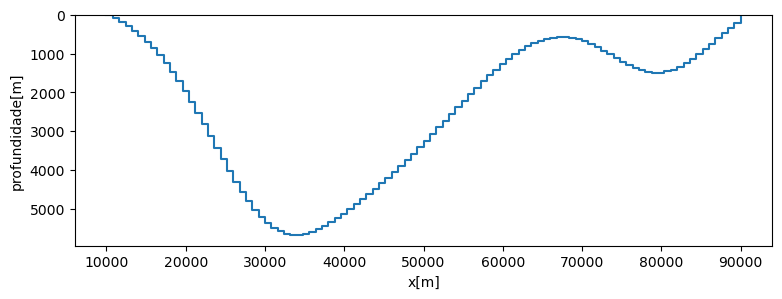

In [13]:
profundidades, x_min, x_max = sintetico()
plota_prismas(profundidades, x_min, x_max)

In [14]:
def modelagem_direta(profundidades, x_min, x_max, x, contraste_densidade):
    coordinates = (x, np.zeros_like(x), np.zeros_like(x))
    bordas = bd.line_coordinates(x_min, x_max, size = profundidades.size + 1)

    prismas = [
        [bordas[i], bordas[i+1], -500e3, 500e3, -profundidades[i], 0]
        for i in range(profundidades.size)
    ]

    dados = hm.prism_gravity(coordinates, prismas, np.full_like(profundidades, contraste_densidade), field="g_z")
    return dados

In [15]:
x = bd.line_coordinates(0,100e3, size=60)
contraste_densidade = -200 #kg/m³

dados = modelagem_direta(profundidades, x_min, x_max, x, contraste_densidade)
# dados += np.random.default_rng()

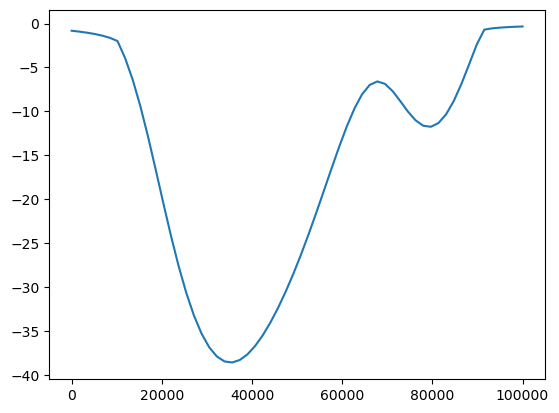

In [16]:
plt.plot(x, dados)

<Axes: >

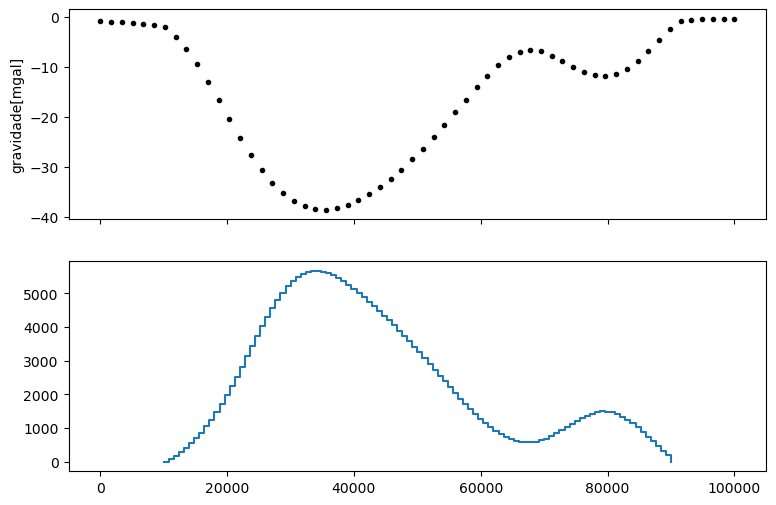

In [17]:
fig, axes = plt.subplots(2,1, figsize=(9,6), sharex=True)

ax = axes[0]
ax.plot(x, dados, ".k")
ax.set_ylabel("gravidade[mgal]")

plota_prismas(profundidades, x_min, x_max, ax=axes[1])
